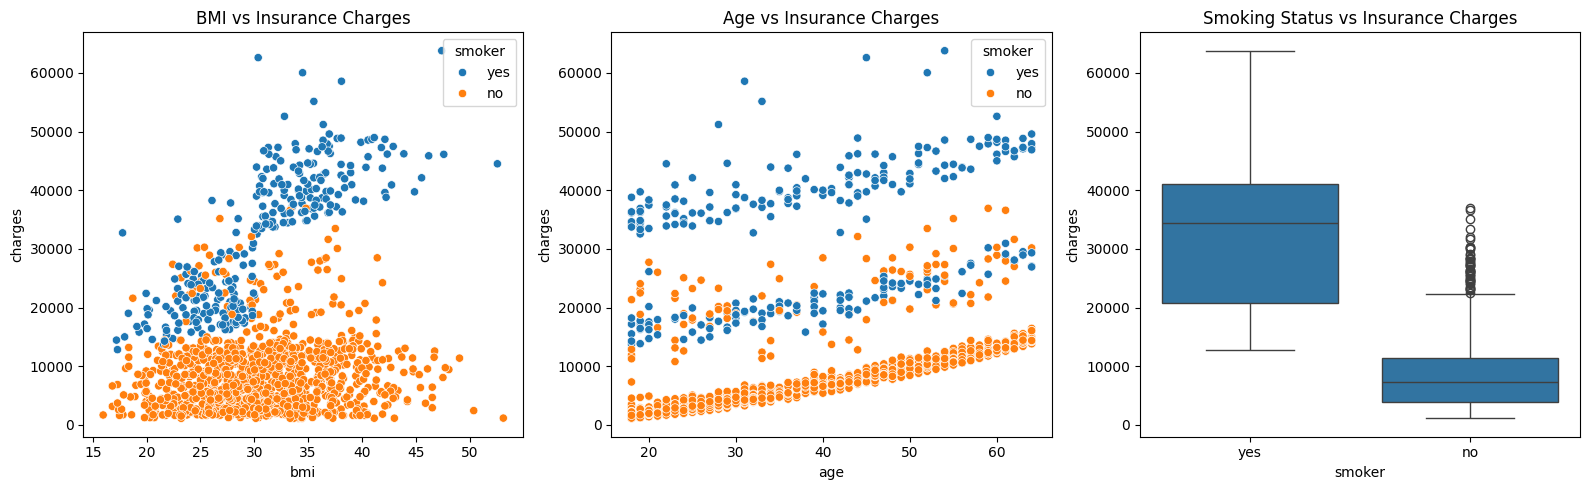

Mean Absolute Error (MAE): $4186.51
Root Mean Squared Error (RMSE): $5799.59


In [2]:
# Task 4: Predicting Insurance Claim Amounts using Label Encoding

# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("insurance.csv")  # Use correct path if different

# Step 1: Visualize relationships
plt.figure(figsize=(16, 5))

# BMI vs Charges
plt.subplot(1, 3, 1)
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('BMI vs Insurance Charges')

# Age vs Charges
plt.subplot(1, 3, 2)
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs Insurance Charges')

# Smoker vs Charges
plt.subplot(1, 3, 3)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoking Status vs Insurance Charges')

plt.tight_layout()
plt.show()

# Step 2: Encode categorical features using Label Encoding
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])         # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker'])   # yes=1, no=0
df['region'] = le.fit_transform(df['region'])   # northeast=1, etc.

# Step 3: Prepare features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
